# Data Wrangling mit Python I

## Einführung

Die Programmiersprache Python hat in den letzten Jahren unglaublich an Beliebtheit gewonnen (Stack Overflow anfragen mit angeben?). Dies liegt zum einen an der Einsteigerfreundlichkeit und zum anderen an den vielen Anwendungsmöglichkeiten. Vorallem im  wissenschaftlichen Bereich ist wird es für die Data-Analysis und das Machine Learning zu einem einsteigerfreundlichen und mächtigen Werkzeug geworden.  
Im Rahmen dieses Kurses soll in diesem Jupyter-Notebook(dazu gleich mehr) grundlegende Begriffe bei der Arbeit mit Pandas (dazu dann später mehr) vorgestellt werden.  Datenaufbereitung - auch Data Wrangling oder Datan Mungling genant - erlernen zu lassen.



## Werkzeuge

### Jupyter-Notebook

Unser Arbeitsmittel ist ein Jupyter-Notebook (im weiteren nur noch Notebook genannt). Diese durch Zellen struktuierte Arbeitsoberfläche lässt uns ausführbaren Code mit stylierbaren Textzeilen verbinden. Dadurch können wir unsere Arbeitsschritte nachvollziehbar halten und gleichzeitig dokumentieren.

Grundsätzlich lassen sich die Zellen eines Notebooks in drei Typen unterteilen:

1. Text-Zellen zur formatierten Ausgabe von Text
2. Code-Zellen zur Ausführung von Python-Code
3. Output-Zellen zur Ausgabe der Ergebnisse von Code-Zellen

Anders als bei der [WYSIWYG](https://de.wikipedia.org/wiki/WYSIWYG "Einfach mal klicken ;-)") Textbearbeitung - welche Beispielsweise bei Microsoft Word oder Libre Office Writer Verwendung findet - wird bei uns die Formatierung des Textes in den Text selbst geschrieben. Dabei wird das beliebte [Markdown-Format](https://markdown.de/) verwendet. Genauere Informationen gibt es in der [Jupyter-Notebook Dokumentation](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html) und auf diesem [Cheatsheet](https://www.heise.de/mac-and-i/downloads/65/1/1/6/7/1/0/3/Markdown-CheatSheet-Deutsch.pdf).

Code-Zellen werden als Zellen mit grauem Hintergrund dargestellt und können mittels des kleinen Dreiecks (oder der Tastenkombination <kbd>Ctrl + Enter</kbd>) ausgeführt werden. Probiere es mal mit der nächsten Zelle aus!

In [1]:
# Dies ist eine Zelle, in der Code ausgeführt werden kann.

def say_hello_to(name):
    return f"Hello, my Friend {name}!!!"  # https://realpython.com/python-f-strings/

my_name = "Alex"
print(say_hello_to(my_name))

# Die Output-Zelle für diese Code-Zelle 
# erscheint nach der Ausführung gleich unter ihr

Hello, my Friend Alex!!!
Alex


'Alex'

'Alex'

Super oder? Das Ausführen einer Code-Zelle funktioniert also wie die Ausführung eines Python-Skripts. Die Code-Zellen im Notebook besitzen jedoch einige Eigenheiten, die wir von einem Python-Skript nicht kennen.

In [2]:
test_name = "Test Name"
print("test_name")
display("test_name")
test_name

test_name


'test_name'

'Test Name'

Beispielsweise wird die Letzte Zeile einer Code-Zelle ausgegeben, was an der Ausgabe `'Test Name'` zu sehen ist. Diese Ausgabe lässt sich auch mit der Methode `display()` erreichen und unterscheidet sich teilweise wesentlich von der Methode `print()`, was im Verlauf des Notebooks klarer wird.

Gucken wir uns eine weitere Eigenheit am nächsten Beispiel an. Überlege dir jedoch vor Ausführung der Code-Zelle, was bei einem Python-Skript passieren würde.

In [57]:
print(say_hello_to(my_name))

Hello, my Friend Alex!!!


Die Funktion `say_hello_to()` kann mit dem Parameter `my_name` aufgerufen werden, obwohl weder die Funktion `say_hello_to()` noch die Variable `my_name` in der Code-Zelle definiert wurde. Es zeigt sich, dass die Ergebnisse jeder ausgeführten Code-Zelle auch nach ihrer Beending der Notebook-Umgebung zur Verfügung stehen. Damit ist die Reihenfolge der Ausführung bei einem Notebook entscheidend und muss beachtet werden!  
Besonders bei der Importierung von Packeten sowie der Wiederverwendung von Funktionen und Variablen-Namen sollte dieses "Gedächtnis" des Notebooks beachtet werden. Soll das "Gedächtnis" gelöscht werden, muss der Kernel des Notebooks zurückgesetzt werden. Dies kann in der oberen Tool-Leiste durchgeführt werden.

### Python-Pakete

Um beim Programmieren nicht alles selbst machen zu müssen, greifen wir auf Erfahrung anderer Programmierer/-innen mittels Pakete zurück.
Grundlage für die Datenaufbereitung sind die folgenden 3 Pakete:

1. ***Pandas*** für vereinfachte Datenmanipulation und -analyse
2. ***NumPy*** für numerische Berechnungen und der Arbeit mit Matrizen
3. ***Matplotlib*** für die Visualiserung (Diagramme, Histogramme, ...) von Daten

Diese werden zu Begin unseres Notebooks mittels des folgenden Codes importiert.

In [3]:
# Pakete importieren
# ------------------

# die Abkürzungen am besten beibehalten
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

So weit so gut! Nachdem wir uns nun etwas mit unserer Arbeitsoberfläche vertraut gemacht haben und die wichtigsten Pakete geladen haben, wollen wir uns mit 2 wichtigen Konzepten bei der Datenaufbereitung mit Python beschäftigen. ***Series*** und ***DataFrame*** welche Bestandteil des Paketes *Pandas* sind.

## *Series* und *DataFrame*

### *Series* 

*Series* (zu Deutsch Serie/Reihe) stellen einfach ausgedrückt (Zeit-)Reihen dar, in denen Daten gespeichert sind. *Series* ermöglichen einen einfachen Zugang auf die grundlegende Eigenschaften und Verarbeitungsformen der in inen enthaltenen Daten.Wie *Series* aus aus Python-Listen und Numpy-Arrays erstellt werden können, sehen wir in der nächsten Code-Zelle.

Tipp: am besten jede Serie mit `s_` beginnen um sie klar von anderen Python-Objekten unterscheidbar zu machen.

In [10]:
# Erstellungsmöglichkeiten von Series
# -----------------------------------

## Python-Listen können sehr einfach mit `pd.Series()` in eine Series umgewandelt werden 

my_float_list = [1,2,3,3,2,1,1,2,3,0]
s_my_float_list = pd.Series(my_float_list)
print(s_my_float_list)

# Hinweis: np.random.random() erstellt eine gleichverteilte Zufallszahl aus dem Intervall 0 bis 1
random_float_list = [np.random.random() * 180 for i in range(10)]  
s_random_float_list = pd.Series(float_list)
print(s_random_float_list)

## Es können auch NumPy-Objekte - Wie das `numpy.array` - genutzt werden 
# Hinweis: np.random.random(10) erstellt zehn gleichverteilte Zufallszahl aus dem Intervall 0 bis 1
random_float_array = np.array(np.random.random(10)*180)
s_random_float_array = pd.Series(float_array)
display(s_random_float_array)  # bei Serien gibt es keinen Unterschied zwischen `print()` und `display()`

## Um auf einen bestimmten Wert mittels eines zugreifen zu können, müssen - ähnlich zu einer Liste - die eckigen Klammern verwendet werden
print(s_random_float_list[3])
print(s_random_float_array[4])

0    1
1    2
2    3
3    3
4    2
5    1
6    1
7    2
8    3
9    0
dtype: int64
0    107.824212
1      8.311101
2    139.184507
3     92.160009
4     82.373762
5     67.543485
6    104.082168
7     23.670206
8    144.460136
9    163.604547
dtype: float64


0    175.615837
1     72.981849
2    139.645822
3    104.344452
4     54.428193
5     18.279143
6     38.297783
7     92.368629
8    151.317708
9     15.427435
dtype: float64

92.1600088862163
54.42819346246816


So weit so gut! Jetz bist du dran. Erstelle in der nächsten Code-Zelle die geforderten Objekte und überprüfe deinen Code mit der Lösung aus der übernächsten Code-Zelle.

In [13]:
# N1A1: Serien erstellen
# ----------------------

# Erstelle die folgenden Series (die Werte müssen dabei nicht zufällig sein!) und gib sie aus.

## Series mit 10 zufällig generierten Zahlen aus dem Bereich von 0 bis 1
s_float = pd.Series(np.random.random())

## Series mit 10 Elementen, aus der Menge M = {1,2,3,4,5,6}
s_int = pd.Series(


## Series mit 10 Vornamen (alles klein geschrieben)
s_string = 

## Series `s_mix` mit 10 Einträgen, in der Zeichenketten, ganze Zahlen und Gleitkommazahlen vorkommen 
s_

## Ausgabe der Series


# !!! Zeitreihe zusätzlich mit dazu machen --> Visualisierung

0    0.438135
1    0.313455
2    0.005443
3    0.408887
4    0.797456
5    0.566740
6    0.491024
7    0.233912
8    0.462840
9    0.869720
dtype: float64

0    1
1    5
2    6
3    3
4    2
5    1
6    4
7    5
8    2
9    1
dtype: int64

0         alex
1         paul
2        paula
3        erika
4          jan
5         karl
6         vlad
7    franziska
8      sabrina
9      florian
dtype: object

0         1
1      zwei
2         3
3         4
4      fünf
5     6.111
6    zieben
7         8
8    9.9999
9       NaN
dtype: object


In [14]:
# Lösung von N1A1: Serien erstellen
# ---------------------------------


## Series mit 10 zufällig generierten Zahlen aus dem Bereich von 0 bis 1
s_float = pd.Series(np.random.random(10))

## Series mit 10 Elementen, aus der Menge M = {1,2,3,4,5,6}
s_int = pd.Series([1,5,6,3,2,1,4,5,2,1])

## Series mit 10 unterschiedlichen Vornamen (alles klein geschrieben)
s_string = pd.Series(["alex", "paul", "paula","erika", "jan","karl", "vlad", "franziska", "sabrina", "florian"])

## Series `s_mix` mit 10 Einträgen, in der Zeichenketten, ganze Zahlen und Gleitkommazahlen vorkommen 
s_mix = pd.Series([1,"zwei", 3.0, 4, "fünf", 6.111, "zieben", 8, 9.9999, 10])

## Ausgabe der Series
print(s_float, s_int, s_string, s_mix, sep="\n\n")


# Noch mehr Möglichkeiten Series zu erstellen gibt es hier: https://www.geeksforgeeks.org/creating-a-pandas-series/

0    0.904905
1    0.445826
2    0.428608
3    0.684911
4    0.825193
5    0.284490
6    0.075925
7    0.898960
8    0.317112
9    0.729200
dtype: float64

0    1
1    5
2    6
3    3
4    2
5    1
6    4
7    5
8    2
9    1
dtype: int64

0         alex
1         paul
2        paula
3        erika
4          jan
5         karl
6         vlad
7    franziska
8      sabrina
9      florian
dtype: object

0         1
1      zwei
2         3
3         4
4      fünf
5     6.111
6    zieben
7         8
8    9.9999
9        10
dtype: object


### Eigenschaften und Methoden von *Series*

Betrachten wir uns die Ausgabe unserer *Series* fällt uns der `dtype` am unteren Ende jeder *Series* auf. Dieser gibt den (Daten-)Typ der in der vorliegenden *Serie* an, solange dieser Eindeutig ist.
`dtype` stellt jedoch nur eine von vielen Eigenschaften dar, die eine Series besitzt. Durch `.`(Punkt) können wir auf diese Eigenschaften zugreifen und sie abrufen oder verändern.  
Ein kleines Beispliel ist in der nächsten Code-Zelle zu sehen.


In [47]:
# Eigenschaften einer Series
# --------------------------

print(s_float.dtype)
print(s_int.dtype)
print(s_string.dtype)
display(s_mix.dtype)  # etwas unterschiedliche Darstellung beim `dtype`, wobei das 'O' für 'object' steht

print(s_mix.index)

float64
int64
object


dtype('O')

RangeIndex(start=0, stop=10, step=1)


Einer Übersicht aller möglichen Eigenschaften - sowie zusätzlicher Erklärungen - ist in der [Dokumentation](https://pandas.pydata.org/pandas-docs/stable/reference/series.html#attributes) zu finden. Nutze diese [Dokumentation](https://pandas.pydata.org/pandas-docs/stable/reference/series.html#attributes) um richtigen Eigenschaften herauszusuchen und somit die nächsten Aufgaben zu lösen.

In [22]:
# N1A2: Eigenschaften von Serien
# ------------------------------

# Erledige die folgenden Aufgaben und gib das Ergebnis aus.

## Gib die Anzahl an Elementen in `s_float` zurück.
print(s_float.)

## überprüfe, ob `s_mix` und `s_string` den selben Datentyp besitzen
print(s_mix == s_string)

## gibt die Werte von `s_string` als Liste zurück
print(

## setze den index von von `s_int` auf `s_string`
s_
print(s_int)

## setze den 4. Wert von `s_string` auf 'noname'
s_string[]
print(

## stetze den 10. Wert von `s_max` auf `np.NaN`
# Hinweis: `np.NaN` steht für "Not a Number" und wird häufig für fehlende oder fehlerhafte Werte verwendet

print(

SyntaxError: invalid syntax (<ipython-input-22-e47226f4c39a>, line 7)

In [37]:
# Lösung von N1A2: Eigenschaften von Serien
# -----------------------------------------

## Gib die Anzahl an Elementen in `s_float` zurück.
print(s_float.size)

## überprüfe, ob `s_mix` und `s_string` den selben Datentyp besitzen
print(s_mix.dtype == s_string.dtype)

## gibt die Werte von `s_string` als Liste zurück
print(s_string.values)

## setze den index von von `s_int` auf `s_string`
s_int.index = s_string
print(s_int)

## setze den 4. Wert von `s_string` auf 'noname'
s_string[3] = 'noname'
print(s_string)'

## stetze den 10. Wert von `s_max` auf `np.NaN`
# Hinweis: `np.NaN` steht für "Not a Number" und wird häufig für fehlende oder fehlerhafte Werte verwendet
s_mix[9] = np.NaN
print(s_mix)

10
True
['alex' 'paul' 'paula' 'erika' 'jan' 'karl' 'vlad' 'franziska' 'sabrina'
 'florian']
alex         1
paul         5
paula        6
erika        3
jan          2
karl         1
vlad         4
franziska    5
sabrina      2
florian      1
dtype: int64
0         1
1      zwei
2         3
3         4
4      fünf
5     6.111
6    zieben
7         8
8    9.9999
9       NaN
dtype: object


Neben den eben besprochenen Eigenschaften besitzen *Series* auch Methoden, welche ebenfalls mittels `.`(Punkt) aufrufbar sind. Genau wie Funktionen besitzen diese Methoden immer ein Klammerpaar über das Parameter übergeben werden. Die Rückgabewerte können dabei neue *Series* oder wichtige Werte einer *Series* sein. In der nächsten Code-Zelle wird der Aufruf von Methoden einer *Series* kurz demonstriert. 


In [35]:
# Methoden von Series
# -------------------

# Die Methode `append()` "klebt" zwei Series hintereinder und erzeugt somit eine dritte Series.
s_int_float = s_int.append(s_float)
print(s_int_float)

# Die Methode `max()` gibt den größten Wert einer Series mit numersichen Werten zurück
max_s_int_float = s_int_float.max()
print(f"Der Maximalwert von s_float ist {max_s_int_float}")

alex         1.000000
paul         5.000000
paula        6.000000
erika        3.000000
jan          2.000000
karl         1.000000
vlad         4.000000
franziska    5.000000
sabrina      2.000000
florian      1.000000
0            0.904905
1            0.445826
2            0.428608
3            0.684911
4            0.825193
5            0.284490
6            0.075925
7            0.898960
8            0.317112
9            0.729200
dtype: float64
Der Maximalwert von s_float ist 6.0


Eine *Series* besitzt unzählige Methoden, welche in verschiedenen Situationen Anwendung finden. In dem folgenden [Teil der Dokumentation](https://pandas.pydata.org/pandas-docs/stable/reference/series.html#computations-descriptive-stats) werden Methoden für die Deskriptive(Beschreibende) Statistik vorgestellt. Dazu gehören Maximas, Minimas, absolute Beträge und vieles mehr. Suche die richtigen Methoden aus diesem [Teil der Dokumentation](https://pandas.pydata.org/pandas-docs/stable/reference/series.html#computations-descriptive-stats) um die folgenden Aufgaben zu lösen.

In [39]:
# N1A3: Methoden von Series
# -------------------------

## gibt die Anzahl aller Werte in `s_mix` aus, die nicht `np.NaN` sind.
print(s_mix.count

## Gib die Summe aller Werte von `s_int` aus
print(s_float

## Gib den Durchschnitt und die Standardabweichung von `s_int` aus.
print(s_int

## gib alle vorhandenen (eindeutigen) Elemente von `s_int` aus.
print(

## Gib die 3 größten Werte von `s_float` aus.
print(

9
5.595130940361441
3.0 1.8856180831641267
[1 5 6 3 2 4]
0    0.904905
7    0.898960
4    0.825193
dtype: float64


In [ ]:
# Lösung von N1A3: Methoden von Series
# ------------------------------------

## gibt die Anzahl aller Werte in `s_mix` aus, die nicht `np.NaN` sind.
print(s_mix.count())

## Gib die Summe aller Werte von `s_int` aus
print(s_float.sum())

## Gib den Durchschnitt und die Standardabweichung von `s_int` aus.
print(s_int.mean(), s_int.std())

## gib alle vorhandenen (eindeutigen) Elemente von `s_int` aus.
print(s_int.unique())

## Gib die 3 größten Werte von `s_float` aus.
print(s_float.nlargest(3))

Besonders interessant ist die Methode `apply()` ([Dokumentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.apply.html#pandas.Series.apply)), welche eine Funktion auf jeden Wert einer Serie ausführt und diesen somit anpassen kann. Ein kleines Beispiel dafür ist in der nächsten Code-Zelle zu sehen.

In [65]:
# `apply()`-Methode
# -----------------

# Der erste Buchstabe jeder unserer Vornamen in `s_string` wird Groß geschrieben, solange der Vorname nicht "noname" ist.
def capitalize_if_not_noname(value):
    if not value == "noname":
        return value.capitalize()
    else:
        return value

s_cap_string = s_string.apply(capitalize_if_not_noname)
print(s_cap_string)

0         Alex
1         paul
2        Paula
3        Erika
4          Jan
5         Karl
6         Vlad
7    Franziska
8      Sabrina
9      Florian
dtype: object


Durch die `apply`-Methode kann eine *Series* auf die nächsten Arbeitstschritte und Berechnungen vorbereitet werden. Zudem wird durch die Parameterübergabe an `args=` die von  der `apply`-Methode genutzte Funktion weiter beeinflusst (Siehe nächste Code-Zelle). Deshalb ist die `apply()`-Methode so ein flexibles und mächtigens Werzeug deren 
[Dokumentation](https://pandas.pydata.org/pandas-docs/stable/reference/series.html#function-application-groupby-window) einen Blick wert ist.

In [45]:
# Funktion, die 3 Parameter besitzt und von uns im weiteren Verlauf an die `apply`-Methode übergeben wird.
def boolean_grading (grade, pos_grades, neg_grades):
    if grade in pos_grades:
        return True
    elif grade in neg_grades:
        return False
    else:
        raise ValueError


print("Überprüfung auf Bestanden/Durchgefallen:")
passing_grades = [1,2,3,4]
failing_grades = [5,6]
# Die beiden Listen `passing_grades` und `failing_grades` werden mittels `args=` an die Funktion
# `boolean_grading` übergeben und nehmen dort die Position von `pos_grades` und `neg_grades` ein
passed_s_int = s_int.apply(boolean_grading, args=(passing_grades,failing_grades))
print(passed_s_int)

s_passed_count = passed_s_int.value_counts()
s_passed_count.index = ["passed","failed"]
print(s_passed_count)


print("\nÜberprüfung auf 1 und 2:")
good_and_great_grades = [1,2]
other_grades = [3,4,5,6]
# Die beiden Listen `good_and_great_grades` und `other_grades` werden mittels `args=` an die Funktion
# `boolean_grading` übergeben und nehmen dort die Position von `pos_grades` und `neg_grades` ein
good_and_great_s_int = s_int.apply(
    boolean_grading,
    args=(good_and_great_grades,other_grades)
)
print(good_and_great_s_int)

s_good_great_count = good_and_great_s_int.value_counts()
s_good_great_count.index = ["1 or 2", "other"]
print(s_good_great_count)
!!!replace mit aufnehmen

Überprüfung auf Bestanden/Durchgefallen:
alex          True
paul         False
paula        False
erika         True
jan           True
karl          True
vlad          True
franziska    False
sabrina       True
florian       True
dtype: bool
passed    7
failed    3
dtype: int64

Überprüfung auf 1 und 2:
alex          True
paul         False
paula        False
erika        False
jan           True
karl          True
vlad         False
franziska    False
sabrina       True
florian       True
dtype: bool
1 or 2    5
other     5
dtype: int64


['/bin/bash: !replace: Befehl nicht gefunden']

Neben den bereits betrachteten Methoden gibt es viele andere die Anwendung finden. Eine nach Aufgabenbereich strukturierte Übersicht ist in der [Dokumentation zu Series](https://pandas.pydata.org/pandas-docs/stable/reference/series.html) zu finden.

*Series* bieten viele Möglichkeiten der Arbeit mit Daten und Analyse von Daten. Typischerweise kommen Daten jedoch nicht nur in (Zeit-)Reihen vor sondern gemeinsam, weshalb das *DataFrame* eine wichtiege Erweiterung der *Series* darstellt.

### DataFrame

In [67]:
# Pakete importieren
# ------------------

# Die wichtigesten Pakete werden erneut importiert, um das Kapitel für sich betrachten zu können.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



Wie bereits erwähnt stellt eine *Series* eine (Zeit-)Reihe dar und besteht (neben vielen anderen Komponenten wie Datentyp, Name, ...) aus einem Index und der Daten/Werte. Sollen mehrere *Series* miteinander verbunden werden ist das *DataFrame* genau richtig. 

Im Gegensatz zu einer *Series* welche - abgesehen vom Index - nur eine Spalte mit Werten besitzt, kann ein *DataFrame* beliebig viele Spalten in Tabellenform speichern.
![DataFrame_image](https://www.geeksforgeeks.org/wp-content/uploads/creating_dataframe1.png)

In der nächsten Code-Zelle wird zuerst die Erstellung eines *DataFrame* und der Zugriff auf diese betrachtet. teilt sich viele Eigenschaften und Methoden mit den Serien und kann durch 
Das DataFrame kann auch als Kombination mehrerer Serien verstanden werden, welche die selbe Anzahl besitzen und nebeneinander "geklebt" wurden. Am besten ist es daher mit einer Tabelle vergleichbar, wobei auch jede Spalte als Serie gesehen kann.nur ein  erweitert werden, erhälttDas Dataframe stellt eine Tabellarische Darstellung von Daten zur Verfügung und erlaubt die Bearbeitung und Auswertung dieser. 

Tipp: Wir empfehlen - ähnlich wie `s_` bei den *Series* - jedes *DataFrame* mit `df_` zu beginnen.

In [62]:
# Erstellung eines DataFrame
# --------------------------

## Erstellung eines DataFrame aus einem Dictionairy
fruit_dict = {
    "name": ["Apple", "Pears", "iuate", "itaer"],
    "numbers": [10, 14, 16,100],
    "cost": [2.0, 3.45, 5.12, 1.12]  # in Euro
}
df_fruit = pd.DataFrame(fruit_dict)
print(df_fruit)
display(df_fruit)  
# `display()` gibt einen wesentlich besseren Blick auf ein DataFrame
# und sollte daher immer für diese verwendet werden.

## Erstellung eines DataFrame durch "zusammenfügen" mehrer Series
s_int = pd.Series([1,5,6,3,2,1,4,5,2,1])
s_string = pd.Series(["alex", "paul", "paula","erika", "jan","karl", "vlad", "franziska", "sabrina", "florian"])
s_float = pd.Series(np.random.normal(173, 10, 10))  # 10 normalverteilte Werte mit Mittelwert 173 und Std von 10
df_grades = pd.DataFrame()  # anlegen eines leeren DataFrame's
# Die Series werden dem DataFrame `df_grades` als neue Spalten hinzugefügt. <-- Das ist sehr nützlich!!!
df_grades["name"] = s_string
df_grades["grade"] = s_int
df_grades["size"] = s_float
display(df_grades)

## Erstellung eines DataFrame aus einer CSV-Datei
df_football = pd.read_csv("W1_csv-file.csv")
display(df_football)

    name  numbers  cost
0  Apple       10  2.00
1  Pears       14  3.45
2  iuate       16  5.12
3  itaer      100  1.12


,name,numbers,cost
0,Apple,10,2.00
1,Pears,14,3.45
2,iuate,16,5.12
3,itaer,100,1.12


,name,grade,size
0,alex,1,173.307651
1,paul,5,175.082603
2,paula,6,171.218877
3,erika,3,157.803559
4,jan,2,158.234706
5,karl,1,180.640437
6,vlad,4,189.070222
7,franziska,5,176.285235
8,sabrina,2,182.231037
9,florian,1,193.330494


,Name,Größe,Alter,Skill
0,Alex,179.45,19,9.6
1,Thorsten,178.43,23,8.9
2,Paul,178.23,21,9.7


In [65]:
# Zugriff auf ein DataFrame mittels `[]` und `iloc[]`
# -------------------------

## Zugriff auf eine Spalte (Rückgabewert ist eine Series) 
s_fruit_name = df_fruit["name"] # Name der Spalte wird als String in "[]" übergeben
display(s_fruit_name)  

## Zugriff auf mehrere Spalten (Rückgabewert ist ein DataFrame)
display(df_fruit[["name", "cost"]])  # Namen der Spalten werden als Python-Liste übergeben

## Zugriff auf einen/mehrer Indizies  mittels `iloc[]`
display(df_grades.iloc[1])  # Rückgabewert ist eine Series
display(df_grades.iloc[[2,3,4]]) # Rückgabewert ist ein DataFrame
display(df_grades.iloc[2:8]) # Bereichsangabe wie bei einer Python-Liste

0    Apple
1    Pears
2    iuate
3    itaer
Name: name, dtype: object

,name,cost
0,Apple,2.00
1,Pears,3.45
2,iuate,5.12
3,itaer,1.12


name        paul
grade          5
size     175.083
Name: 1, dtype: object

,name,grade,size
2,paula,6,171.218877
3,erika,3,157.803559
4,jan,2,158.234706


,name,grade,size
2,paula,6,171.218877
3,erika,3,157.803559
4,jan,2,158.234706
5,karl,1,180.640437
6,vlad,4,189.070222
7,franziska,5,176.285235


#### Eigenschaften und Methoden eines *DataFrame*
Genau wie *Series* besitzen *DataFrame*'s Eigenschaften und Methoden zur Datenverarbeitung, -bearbeitung und -analyse. Ebenfalls genau wie bei *Series* wird auf die Eigenschaften und Methoden mittels `.` (Punkt) zugreifen. In der nächsten Code-Zelle sind einige  Beispiele für Eigenschaften und Methoden zu sehen, die sich DataFrame und Serie teilen. Mehr Informationen zu den Eigenschaften und Methoden eines DataFrame's sind (wie immer) in der [Dokumentation](https://pandas.pydata.org/pandas-docs/stable/reference/frame.html) zu finden.

In [67]:
# Eigenschaften und Methoden enies DataFrame
# ------------------------------------------

print("Einige Eigenschaften und Methoden die DataFrame's und Series gemeinsman haben:")
print(
    df_grades.index,
    df_grades.size,
    df_grades.shape,
    df_grades.count(),
    df_grades.isna(),
    sep="\n\n"
)

Einige Eigenschaften und Methoden die DataFrame's und Series gemeinsman haben:
RangeIndex(start=0, stop=10, step=1)

30

(10, 3)

name     10
grade    10
size     10
dtype: int64

    name  grade   size
0  False  False  False
1  False  False  False
2  False  False  False
3  False  False  False
4  False  False  False
5  False  False  False
6  False  False  False
7  False  False  False
8  False  False  False
9  False  False  False


Es gibt jedoch auch Eigenschaften und Methoden lediglich das *DataFrame* besitzt. Beispielsweise zeigt die Eigenschaft `columns` die Spaltennamen an, was für eine *Series* keinen Sinn ergeben würde. Ein weiter Beispiel ist die sehr nützliche `query()`-Methode ([Dokumentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.query.html#pandas.DataFrame.query)), welche das Filtern eines *DataFrame*'s ermöglicht.

In [74]:
print("\n\nEigenschaften und Methoden die nur ein DataFrame besitzt:\n")
print(df_grades.columns)
display(df_grades.query("grade <= 2"))  # zeigt alle Einträge an, deren Note besser oder gleich 2 ist



Eigenschaften und Methoden die nur ein DataFrame besitzt:

Index(['name', 'grade', 'size'], dtype='object')


,name,grade,size
0,alex,1,173.307651
4,jan,2,158.234706
5,karl,1,180.640437
8,sabrina,2,182.231037
9,florian,1,193.330494


In der nächsten Code-Zelle sind einige Aufgaben zu sehen, deren Lösung die Benutzung wichtiger Methoden eines DataFrame benötigen.
Nutze die Suchfunktion in der [Dokumentation zu DataFrame's](https://pandas.pydata.org/pandas-docs/stable/reference/frame.html#attributes-and-underlying-data) und das Internet um die Aufgaben zu lösen.

In [75]:
# N1A4: Umgang mit DataFrame
# --------------------------

# Löse die folgenden Aufgaben und gib das Ergebnis aus.

## gib für `df_grades` alle Einträge aus, die größer sind als 170
df_grades.query(

## zeige in `df_football` lediglich die beiden Spalten `name` und `skill` an
df_football[

## Ändere die Spaltenüberschriften für `df_fruit` in die deutschen Übersetzungen
df_fruit.c

## bestimme den Mittelwert und die Standardabweichung der Spalte `size` von `df_grades`

## Zeige an, wie die Verteilung an Noten in `df_grades` ist (groupby)
df_grades.groupby().c

## Sortiere das DataFrame `df_grades` absteigend nach der Größe (sort_values)
df_grades.sort
## ändere den ersten Buchstaben aller Namen in der Spalte `name` in `df_grades` in Großbuchstaben
def cap
df_grades["name"] = df_grades["names"].a

SyntaxError: invalid syntax (<ipython-input-75-c6abcee56278>, line 18)

In [102]:
# Lösung von N1A4: Umgang mit DataFrame
# --------------------------

# Löse die folgenden Aufgaben und gib das Ergebnis aus.

## gib für `df_grades` alle Einträge aus, die größer sind als 170
display(df_grades.query("size > 170"))

## zeige in `df_football` lediglich den Namen und die Fähigkeiten an
display(df_football["Name"])

## Ändere die Spaltenüberschriften für `df_fruit` in die deutschen Übersetzungen
df_fruit.columns = ["Name", "Anzahl", "Kosten"]
display(df_fruit)

## bestimme den Mittelwert und die Standardabweichung der Spalten `size` und `grade` von `df_grades`
display(df_grades.describe())

## Zeige an, wie die Verteilung an Noten in `df_grades` ist.
display(df_grades.groupby("grade").count())

## Sortiere das DataFrame `df_grades` absteigend nach der Größe
display(df_grades.sort_values("size"))

## ändere den ersten Buchstaben aller Namen in der Spalte `name` in `df_grades` in Großbuchstaben
def cap(word):
    return word.capitalize()

df_grades["name"] = df_grades["name"].apply(cap)
display(df_grades)

,name,grade,size
0,Alex,1,173.307651
1,Paul,5,175.082603
2,Paula,6,171.218877
5,Karl,1,180.640437
6,Vlad,4,189.070222
7,Franziska,5,176.285235
8,Sabrina,2,182.231037
9,Florian,1,193.330494


0        Alex
1    Thorsten
2        Paul
Name: Name, dtype: object

,Name,Anzahl,Kosten
0,Apple,10,2.00
1,Pears,14,3.45
2,iuate,16,5.12
3,itaer,100,1.12


,grade,size
count,10.000000,10.000000
mean,3.000000,175.720482
std,1.885618,11.587838
min,1.000000,157.803559
25%,1.250000,171.741070
50%,2.500000,175.683919
75%,4.750000,181.833387
max,6.000000,193.330494


,name,size
grade,,
1,3,3
2,2,2
3,1,1
4,1,1
5,2,2
6,1,1


,name,grade,size
3,Erika,3,157.803559
4,Jan,2,158.234706
2,Paula,6,171.218877
0,Alex,1,173.307651
1,Paul,5,175.082603
7,Franziska,5,176.285235
5,Karl,1,180.640437
8,Sabrina,2,182.231037
6,Vlad,4,189.070222
9,Florian,1,193.330494


,name,grade,size
0,Alex,1,173.307651
1,Paul,5,175.082603
2,Paula,6,171.218877
3,Erika,3,157.803559
4,Jan,2,158.234706
5,Karl,1,180.640437
6,Vlad,4,189.070222
7,Franziska,5,176.285235
8,Sabrina,2,182.231037
9,Florian,1,193.330494


### Visualisierung von *Series* und *DataFrame*'s

Zur Visualisierung wird normalerweise das Paket *Matplotlib* verwendet, welches weiter oben bereits von uns mittels `import matplotlib.pyplot` importiert wurde und uns im weiteren Verlauf mit `plt` zur Verfügung steht. Der größte Teil der Visualisierung wird jedoch über die *Series* und dem *DataFrame* durchgeführt. Auf die verschiedenen Visualiserungsmöglichkeiten wird hierbei mittels Methoden zugegriffen, die von dem jeweiligen Objekt (*Series* oder *DataFrame*) aufgerufen werden. Hier ein kleines Beispiel.

<AxesSubplot:ylabel='Frequency'>

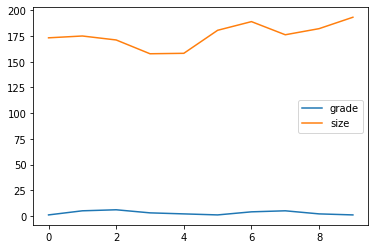

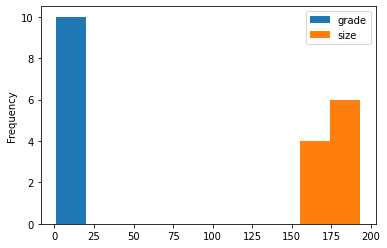

In [103]:
# Visualisierung
# --------------

import matplotlib.pyplot as plt

# https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html

df_grades.plot.line()  # Erstellt ein Liniendiagramm 
df_grades.plot.hist()  # erstellt ein Histogramm

Grundsätzlich mit `plot` anzeigt werden, dass etwas "geplottet" (visualisiert) werden soll. Die auf `plot` folgende Methode entscheidet, welche der vielen verschiedenen Visualisierungsmöglichkeiten verwendet wird. Veränderungswünsche und Einstellungen der Visualisierung werden mittels der Parameterübergabe an die gewählte Methode durchgeführt. Hier wieder ein kleines Beispiel

<AxesSubplot:ylabel='name'>

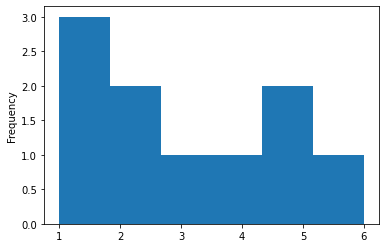

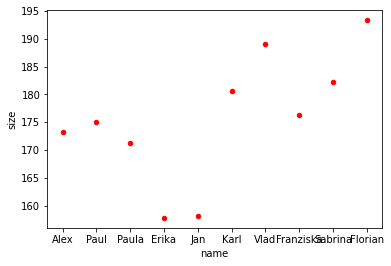

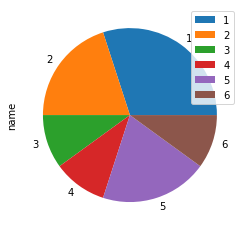

In [104]:
# Histogramm für die Spalte `grade` vom DataFrame `df_grades` mit Zusatzeinstellungen
df_grades["grade"].plot.hist(bins=6, grid=False)
# stellt die beiden Spalten `name` und `size` in einem Scatter-Diagramm mit Roten Punkten dar
df_grades.plot.scatter(x="name", y="size", c="red")
# stellt die Verteilung der Noten als Kreisdiagramm dar, wobei die Spalte `name` enthällt die Anzahlen der Noten enthällt
df_grades.groupby("grade").count().plot.pie(y="name", use_index = True) 

## Zusammenfassungen

Beim Druchgehen des Notebooks wurden die folgenden Themen besprochen

- Ein Jupyter-Notebook stellt eine nützliches Arbeitsoberfläche für die Datenaufbereitung dar
- Zur Arbeit mit Daten werden die Pakete Pandas, NumPy und Matplotlib verwendet
- Eine *Series* ist ein Pandas-Objekt, welches als (Zeit-)Reihe mit Eigenschaften und Methoden verstanden werden kann
- Ein DataFrame ist ein Pandas-Objekt, welches als eine Tabelle mit Eigenschaften und Methoden verstanden werden kann
- Die Arbeit mit Pandas-Objekten geschieht über die eben erwähnten Eigenschaften und Methoden, welche mit `'.'` (Punkt) erreichbar sind
- Zur Visualisierung werden die verschiedenen `plot`-Methoden verwendet, deren Konfiguration über Parameterübergabe geschieht

## Schlusswort

Durch dieses Notebook wurden nur grundlegende Werkzeuge bereitgestellt die Programmiersprache Python im Rahmen von Data Science zu verwenden.  
Es liegt nun an ihnen diese Werkzeuge zu erproben, zu nuzten und danach den Werkzeugkasten auszubauen. Durch Verwendung der Dokumentation und des Internets ist es möglich fast alle Aufgaben zu lösen und Probleme zu bewältigt. Python als Werkzeug stellt alle dafür notwendigen Funktion zur Verfügung. 